In [1]:
using CSV
using DataFrames
using Statistics
using Plots
using Colors
using Distributions
using Images


(process:5684): GLib-GIO-WARNING **: 11:30:34.880: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.5.15.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs


In [17]:
data = CSV.read("..\\..\\data\\HAM10000_metadata.csv", DataFrame)

age_clean = [age for age in data[:, :age] if typeof(age)==Float64]
dx_type_clean = unique(data[:, :dx_type])
age_deviation = std(age_clean)
age_mean      = mean(age_clean)
age_median    = median(age_clean)


# true - cancerous
# false - non-cancerous
mutation_types = Dict(
    "bkl"   => false,  # Benign keratosis-like lesions 
    "nv"    => false,  # Melanocytic nevi
    "df"    => false,  # Dermatofibroma
    "mel"   => true,   # Melanoma
    "vasc"  => false,  # Vascular lesions
    "bcc"   => true,   # Basal cell carcinoma
    "akiec" => true    # Actinic keratoses and intraepithelial carcinoma / Bowen's diesease
)

function filter_by_diagnosis(data, abbreviation)
    filtered_data = filter_by(data, "dx", abbreviation)
end

function filter_by_diagnose_type(data, abbreviation)
    filtered_data = filter_by(data, "dx_type", abbreviation)
end

function filter_by(data, key, value)
    filtered_data = DataFrame([x for x in eachrow(data) if x[key] == value])
end

mel_data = filter_by_diagnosis(data, "mel")
display(first(mel_data, 5))


,lesion_id,image_id,dx,dx_type,age,sex,localization
,String15,String15,String7,String15,Float64?,String7,String15
1,HAM_0000871,ISIC_0025964,mel,histo,40.0,female,chest
2,HAM_0000871,ISIC_0030623,mel,histo,40.0,female,chest
3,HAM_0000040,ISIC_0027190,mel,histo,80.0,male,upper extremity
4,HAM_0005678,ISIC_0031023,mel,histo,60.0,male,chest
5,HAM_0005678,ISIC_0028086,mel,histo,60.0,male,chest


,lesion_id,image_id,dx,dx_type,age,sex,localization
,String15,String15,String7,String15,Float64?,String7,String15
1,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
2,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
4,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
5,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


5340

,lesion_id,image_id,dx,dx_type,age,sex,localization
,String15,String15,String7,String15,Float64?,String7,String15
1,HAM_0001751,ISIC_0024698,nv,consensus,70.0,male,face
2,HAM_0003030,ISIC_0028876,bkl,consensus,75.0,female,face
3,HAM_0003030,ISIC_0029527,bkl,consensus,75.0,female,face
4,HAM_0006064,ISIC_0032111,bkl,consensus,75.0,male,back
5,HAM_0006064,ISIC_0031132,bkl,consensus,75.0,male,back


902

,lesion_id,image_id,dx,dx_type,age,sex,localization
,String15,String15,String7,String15,Float64,String7,String15
1,HAM_0004453,ISIC_0031825,bkl,confocal,65.0,female,face
2,HAM_0004453,ISIC_0030677,bkl,confocal,65.0,female,face
3,HAM_0005743,ISIC_0025038,bkl,confocal,60.0,female,face
4,HAM_0000999,ISIC_0029927,bkl,confocal,70.0,female,face
5,HAM_0000999,ISIC_0026567,bkl,confocal,70.0,female,face


69

,lesion_id,image_id,dx,dx_type,age,sex,localization
,String15,String15,String7,String15,Float64,String7,String15
1,HAM_0000559,ISIC_0024693,nv,follow_up,45.0,female,upper extremity
2,HAM_0004932,ISIC_0032212,nv,follow_up,45.0,female,foot
3,HAM_0004516,ISIC_0025775,nv,follow_up,45.0,female,neck
4,HAM_0006510,ISIC_0029828,nv,follow_up,55.0,female,lower extremity
5,HAM_0007567,ISIC_0031588,nv,follow_up,45.0,female,lower extremity


3704

Dict{Any, Any}()

,lesion_id,image_id,dx,dx_type,age,sex,localization
,String15,String15,String7,String15,Float64,String7,String15
1,HAM_0004453,ISIC_0031825,bkl,confocal,65.0,female,face
2,HAM_0004453,ISIC_0030677,bkl,confocal,65.0,female,face
3,HAM_0005743,ISIC_0025038,bkl,confocal,60.0,female,face
4,HAM_0000999,ISIC_0029927,bkl,confocal,70.0,female,face
5,HAM_0000999,ISIC_0026567,bkl,confocal,70.0,female,face


,lesion_id,image_id,dx,dx_type,age,sex,localization
,String15,String15,String7,String15,Float64?,String7,String15
1,HAM_0001751,ISIC_0024698,nv,consensus,70.0,male,face
2,HAM_0003030,ISIC_0028876,bkl,consensus,75.0,female,face
3,HAM_0003030,ISIC_0029527,bkl,consensus,75.0,female,face
4,HAM_0006064,ISIC_0032111,bkl,consensus,75.0,male,back
5,HAM_0006064,ISIC_0031132,bkl,consensus,75.0,male,back


,lesion_id,image_id,dx,dx_type,age,sex,localization
,String15,String15,String7,String15,Float64,String7,String15
1,HAM_0000559,ISIC_0024693,nv,follow_up,45.0,female,upper extremity
2,HAM_0004932,ISIC_0032212,nv,follow_up,45.0,female,foot
3,HAM_0004516,ISIC_0025775,nv,follow_up,45.0,female,neck
4,HAM_0006510,ISIC_0029828,nv,follow_up,55.0,female,lower extremity
5,HAM_0007567,ISIC_0031588,nv,follow_up,45.0,female,lower extremity


,lesion_id,image_id,dx,dx_type,age,sex,localization
,String15,String15,String7,String15,Float64?,String7,String15
1,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
2,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
4,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
5,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


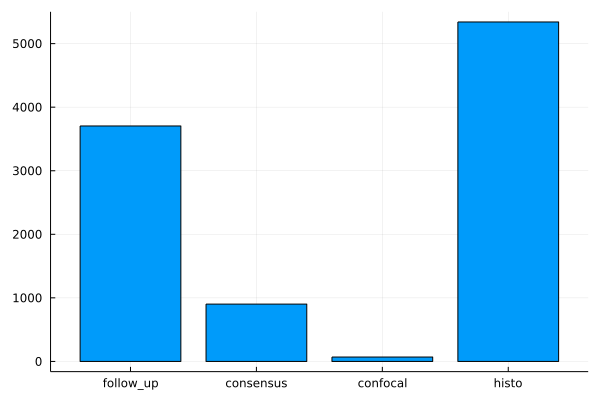

In [24]:

# diagnosis method

dict_bar = Dict()
display(dict_bar)

for dx_type in dx_type_clean
    dx_type_data = filter_by_diagnose_type(data, dx_type)
    display(first(dx_type_data, 5))
    dict_bar[dx_type] = nrow(dx_type_data)
end

bar(dict_bar, legend=false)